In [27]:
from os.path import dirname, join as pjoin
import scipy.io as spio
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import os, fnmatch
from operator import itemgetter
from mne.stats import permutation_cluster_test

# Reading Files from Directory (Video)

In [2]:
protocol_files_v=[]
listOfFiles = os.listdir('.')  
pattern = "*_Video.xlsx"  
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        res = entry.split('_')
        res.append(entry)
        protocol_files_v.append(res)
protocol_files_v=sorted(protocol_files_v, key=itemgetter(2))

data_files_alpha_v=[]
import os, fnmatch
listOfFiles = os.listdir('.')  
pattern = "*alpha_Video.mat"  
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        res = entry.split('_')
        res.append(entry)
        data_files_alpha_v.append(res)
data_files_alpha_v=sorted(data_files_alpha_v, key=itemgetter(0))

data_files_theta_v=[]
import os, fnmatch
listOfFiles = os.listdir('.')  
pattern = "*theta_Video.mat"  
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        res = entry.split('_')
        res.append(entry)
        data_files_theta_v.append(res)
data_files_theta_v=sorted(data_files_theta_v, key=itemgetter(0))

data_files_beta_v=[]
import os, fnmatch
listOfFiles = os.listdir('.')  
pattern = "*beta_Video.mat"  
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        res = entry.split('_')
        res.append(entry)
        data_files_beta_v.append(res)
data_files_beta_v=sorted(data_files_beta_v, key=itemgetter(0))

channels=pd.read_excel('EEG_SENSOR_NAMES.xlsx')
ch=channels.channels.values.tolist()

# Formation of the Band-Averaged Data (Video)

In [3]:
ALPHA_VIDEO=np.zeros(2500)
DATA_ALPHA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):

    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_alpha=data_files_alpha_v[k][3]
    
    mat = spio.loadmat(data_alpha)
    aa=mat['alpha_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    DATA_ALPHA_series = pd.concat([DATA_ALPHA_series,df])  
    ALPHA_VIDEO=ALPHA_VIDEO+matrix/40
    

    
THETA_VIDEO=np.zeros(2500)
DATA_THETA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_theta=data_files_theta_v[k][3]
    
    mat = spio.loadmat(data_theta)
    aa=mat['theta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    DATA_THETA_series = pd.concat([DATA_THETA_series,df])  
    THETA_VIDEO=THETA_VIDEO+matrix/40
    

    
BETA_VIDEO=np.zeros(2500)
DATA_BETA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_beta=data_files_beta_v[k][3]
    
    mat = spio.loadmat(data_beta)
    aa=mat['beta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    DATA_BETA_series = pd.concat([DATA_BETA_series,df]) 
    BETA_VIDEO=BETA_VIDEO+matrix/40

# Reading Files from Directory (Text)

In [5]:
protocol_files=[]
listOfFiles = os.listdir('.')  
pattern = "*_Text.xlsx"  
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        res = entry.split('_')
        res.append(entry)
        protocol_files.append(res)
protocol_files=sorted(protocol_files, key=itemgetter(2))

data_files_alpha=[]
import os, fnmatch
listOfFiles = os.listdir('.')  
pattern = "*alpha_Text.mat"  
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        res = entry.split('_')
        res.append(entry)
        data_files_alpha.append(res)
data_files_alpha=sorted(data_files_alpha, key=itemgetter(0))

data_files_theta=[]
import os, fnmatch
listOfFiles = os.listdir('.')  
pattern = "*theta_Text.mat"  
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        res = entry.split('_')
        res.append(entry)
        data_files_theta.append(res)
data_files_theta=sorted(data_files_theta, key=itemgetter(0))

data_files_beta=[]
import os, fnmatch
listOfFiles = os.listdir('.')  
pattern = "*beta_Text.mat"  
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        res = entry.split('_')
        res.append(entry)
        data_files_beta.append(res)
data_files_beta=sorted(data_files_beta, key=itemgetter(0))

channels=pd.read_excel('EEG_SENSOR_NAMES.xlsx')
ch=channels.channels.values.tolist()

# Formation of the Band-Averaged Data (TEXT)

In [6]:
ALPHA_TEXT=np.zeros(3000)
DATA_ALPHA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_alpha=data_files_alpha[k][3]   
    mat = spio.loadmat(data_alpha)
    aa=mat['alpha_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:3000]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    DATA_ALPHA_series = pd.concat([DATA_ALPHA_series,df])  
    ALPHA_TEXT=ALPHA_TEXT+matrix/40

    
DATA_THETA_series=pd.DataFrame()
THETA_TEXT=np.zeros(3000)
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_theta=data_files_theta[k][3]  
    mat = spio.loadmat(data_theta)
    aa=mat['theta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:3000]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    DATA_THETA_series = pd.concat([DATA_THETA_series,df])  
    THETA_TEXT=THETA_TEXT+matrix/40

    
DATA_BETA_series=pd.DataFrame()
BETA_TEXT=np.zeros(3000)
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_beta=data_files_beta[k][3]   
    mat = spio.loadmat(data_beta)
    aa=mat['beta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:3000]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    DATA_BETA_series = pd.concat([DATA_BETA_series,df])  
    BETA_TEXT=BETA_TEXT+matrix/40


# Dividing EEG sensors into regions

# Video-based Scenes 

## ALPHA

Text(0, 0.5, 'ERSP in alpha-band, video-based scenes')

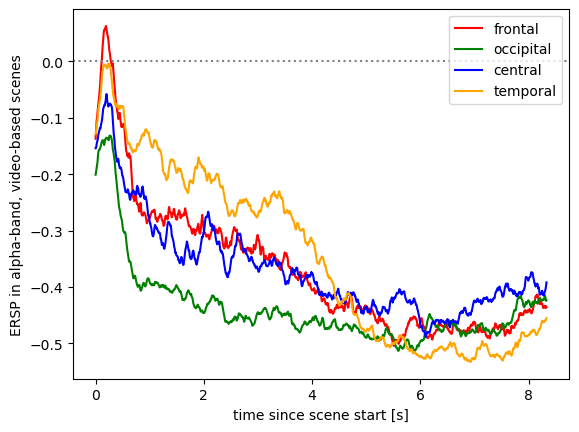

In [13]:
ALPHA_VIDEO_ch=np.zeros((18,2500))

for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_alpha=data_files_alpha_v[k][3]
    
    mat = spio.loadmat(data_alpha)
    aa=mat['alpha_']
    aa1=np.median(aa, axis=0) #over triasl
    
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa1[0:18,0:2500]
    ALPHA_VIDEO_ch=ALPHA_VIDEO_ch+matrix/40

    
ALPHA_VIDEO_front=np.median(ALPHA_VIDEO_ch[[2,3,4,8,9],:],axis=0)
ALPHA_VIDEO_centr=np.median(ALPHA_VIDEO_ch[[1,5,7],:],axis=0)
ALPHA_VIDEO_occip=np.median(ALPHA_VIDEO_ch[[0,6,12,13],:],axis=0)
ALPHA_VIDEO_temp=np.median(ALPHA_VIDEO_ch[[10,11,14,15,16,17],:],axis=0)

ALPHA_VIDEO_front_25=np.percentile(ALPHA_VIDEO_ch[[2,3,4,8,9],:],25, axis=0)
ALPHA_VIDEO_centr_25=np.percentile(ALPHA_VIDEO_ch[[1,5,7],:],25, axis=0)
ALPHA_VIDEO_occip_25=np.percentile(ALPHA_VIDEO_ch[[0,6,12,13],:],25, axis=0)
ALPHA_VIDEO_temp_25=np.percentile(ALPHA_VIDEO_ch[[10,11,14,15,16,17],:],25, axis=0)

#75_percentile

ALPHA_VIDEO_front_75=np.percentile(ALPHA_VIDEO_ch[[2,3,4,8,9],:],75, axis=0)
ALPHA_VIDEO_centr_75=np.percentile(ALPHA_VIDEO_ch[[1,5,7],:],75, axis=0)
ALPHA_VIDEO_occip_75=np.percentile(ALPHA_VIDEO_ch[[0,6,12,13],:],75, axis=0)
ALPHA_VIDEO_temp_75=np.percentile(ALPHA_VIDEO_ch[[10,11,14,15,16,17],:], 75, axis=0)

x1 = [i/300 for i in range(len(ALPHA_VIDEO_ch[0,:]))]

plt.plot(x1,ALPHA_VIDEO_front,"-r", label="frontal")
plt.plot(x1,ALPHA_VIDEO_occip,"-g", label="occipital")
plt.plot(x1,ALPHA_VIDEO_centr,"-b", label="central")
plt.plot(x1,ALPHA_VIDEO_temp, label="temporal", color='orange')
plt.legend(loc="upper right")
plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.ylabel("ERSP in alpha-band, video-based scenes")

## THETA

Text(0, 0.5, 'ERSP in theta-band, video-based scenes')

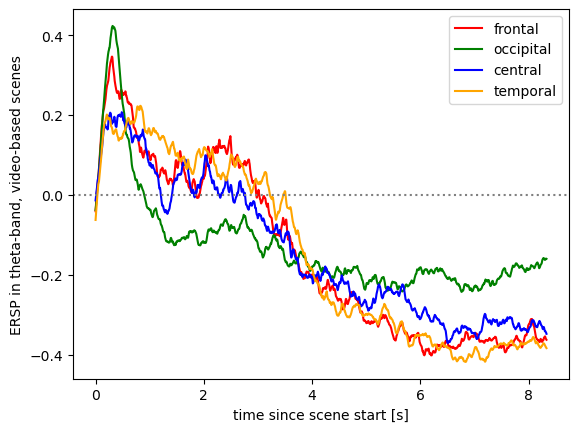

In [14]:
THETA_VIDEO_ch=np.zeros((18,2500))

for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_theta=data_files_theta_v[k][3]
    
    mat = spio.loadmat(data_theta)
    aa=mat['theta_']
    aa1=np.median(aa, axis=0) #over triasl
    
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa1[0:18,0:2500]
    THETA_VIDEO_ch=THETA_VIDEO_ch+matrix/40

    
THETA_VIDEO_front=np.median(THETA_VIDEO_ch[[2,3,4,8,9],:],axis=0)
THETA_VIDEO_centr=np.median(THETA_VIDEO_ch[[1,5,7],:],axis=0)
THETA_VIDEO_occip=np.median(THETA_VIDEO_ch[[0,6,12,13],:],axis=0)
THETA_VIDEO_temp=np.median(THETA_VIDEO_ch[[10,11,14,15,16,17],:],axis=0)


THETA_VIDEO_front_25=np.percentile(THETA_VIDEO_ch[[2,3,4,8,9],:],25, axis=0)
THETA_VIDEO_centr_25=np.percentile(THETA_VIDEO_ch[[1,5,7],:],25, axis=0)
THETA_VIDEO_occip_25=np.percentile(THETA_VIDEO_ch[[0,6,12,13],:],25, axis=0)
THETA_VIDEO_temp_25=np.percentile(THETA_VIDEO_ch[[10,11,14,15,16,17],:],25, axis=0)

#75_percentile

THETA_VIDEO_front_75=np.percentile(THETA_VIDEO_ch[[2,3,4,8,9],:],75, axis=0)
THETA_VIDEO_centr_75=np.percentile(THETA_VIDEO_ch[[1,5,7],:],75, axis=0)
THETA_VIDEO_occip_75=np.percentile(THETA_VIDEO_ch[[0,6,12,13],:],75, axis=0)
THETA_VIDEO_temp_75=np.percentile(THETA_VIDEO_ch[[10,11,14,15,16,17],:], 75, axis=0)

x1 = [i/300 for i in range(len(THETA_VIDEO_ch[0,:]))]

plt.plot(x1,THETA_VIDEO_front,"-r", label="frontal")
plt.plot(x1,THETA_VIDEO_occip,"-g", label="occipital")
plt.plot(x1,THETA_VIDEO_centr,"-b", label="central")
plt.plot(x1,THETA_VIDEO_temp, label="temporal", color='orange')
plt.legend(loc="upper right")
plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.ylabel("ERSP in theta-band, video-based scenes")

## BETA

Text(0, 0.5, 'ERSP in beta-band, video-based scenes')

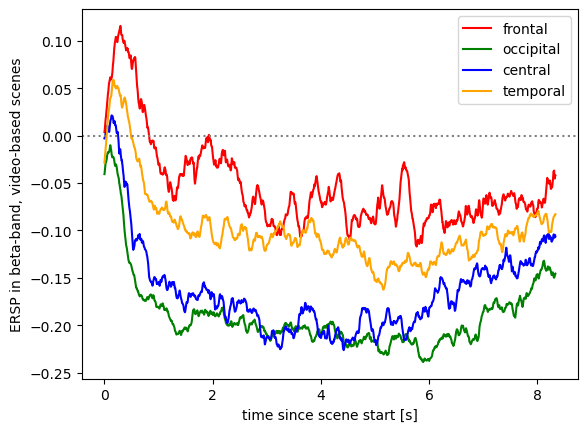

In [15]:
BETA_VIDEO_ch=np.zeros((18,2500))

for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_beta=data_files_beta_v[k][3]
    
    mat = spio.loadmat(data_beta)
    aa=mat['beta_']
    aa1=np.median(aa, axis=0) #over triasl
    
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa1[0:18,0:2500]
    BETA_VIDEO_ch=BETA_VIDEO_ch+matrix/40

    
BETA_VIDEO_front=np.median(BETA_VIDEO_ch[[2,3,4,8,9],:],axis=0)
BETA_VIDEO_centr=np.median(BETA_VIDEO_ch[[1,5,7],:],axis=0)
BETA_VIDEO_occip=np.median(BETA_VIDEO_ch[[0,6,12,13],:],axis=0)
BETA_VIDEO_temp=np.median(BETA_VIDEO_ch[[10,11,14,15,16,17],:],axis=0)

BETA_VIDEO_front_25=np.percentile(BETA_VIDEO_ch[[2,3,4,8,9],:],25, axis=0)
BETA_VIDEO_centr_25=np.percentile(BETA_VIDEO_ch[[1,5,7],:],25, axis=0)
BETA_VIDEO_occip_25=np.percentile(BETA_VIDEO_ch[[0,6,12,13],:],25, axis=0)
BETA_VIDEO_temp_25=np.percentile(BETA_VIDEO_ch[[10,11,14,15,16,17],:],25, axis=0)

#75_percentile

BETA_VIDEO_front_75=np.percentile(BETA_VIDEO_ch[[2,3,4,8,9],:],75, axis=0)
BETA_VIDEO_centr_75=np.percentile(BETA_VIDEO_ch[[1,5,7],:],75, axis=0)
BETA_VIDEO_occip_75=np.percentile(BETA_VIDEO_ch[[0,6,12,13],:],75, axis=0)
BETA_VIDEO_temp_75=np.percentile(BETA_VIDEO_ch[[10,11,14,15,16,17],:], 75, axis=0)

x1 = [i/300 for i in range(len(THETA_VIDEO_ch[0,:]))]

plt.plot(x1,BETA_VIDEO_front,"-r", label="frontal")
plt.plot(x1,BETA_VIDEO_occip,"-g", label="occipital")
plt.plot(x1,BETA_VIDEO_centr,"-b", label="central")
plt.plot(x1,BETA_VIDEO_temp, label="temporal", color='orange')
plt.legend(loc="upper right")
plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.ylabel("ERSP in beta-band, video-based scenes")

# Text-based Scenes

## ALPHA

Text(0, 0.5, 'ERSP in alpha-band, TEXT-based scenes')

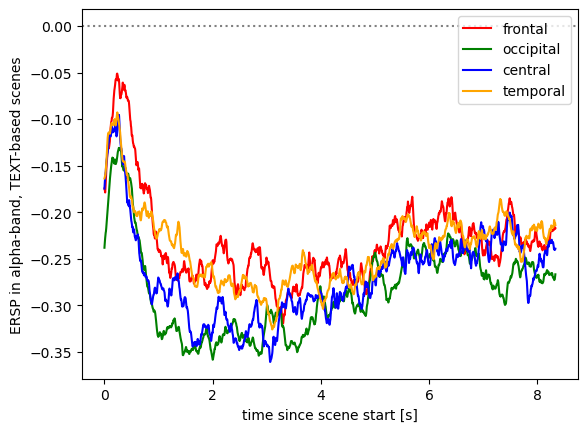

In [16]:
ALPHA_TEXT_ch=np.zeros((18,2500))

for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_alpha=data_files_alpha[k][3]
    
    mat = spio.loadmat(data_alpha)
    aa=mat['alpha_']
    aa1=np.median(aa, axis=0) #over triasl
    
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa1[0:18,0:2500]
    ALPHA_TEXT_ch=ALPHA_TEXT_ch+matrix/40

    
ALPHA_TEXT_front=np.median(ALPHA_TEXT_ch[[2,3,4,8,9],:],axis=0)
ALPHA_TEXT_centr=np.median(ALPHA_TEXT_ch[[1,5,7],:],axis=0)
ALPHA_TEXT_occip=np.median(ALPHA_TEXT_ch[[0,6,12,13],:],axis=0)
ALPHA_TEXT_temp=np.median(ALPHA_TEXT_ch[[10,11,14,15,16,17],:],axis=0)

#25_percentile

ALPHA_TEXT_front_25=np.percentile(ALPHA_TEXT_ch[[2,3,4,8,9],:],25, axis=0)
ALPHA_TEXT_centr_25=np.percentile(ALPHA_TEXT_ch[[1,5,7],:],25, axis=0)
ALPHA_TEXT_occip_25=np.percentile(ALPHA_TEXT_ch[[0,6,12,13],:],25, axis=0)
ALPHA_TEXT_temp_25=np.percentile(ALPHA_TEXT_ch[[10,11,14,15,16,17],:],25, axis=0)

#75_percentile

ALPHA_TEXT_front_75=np.percentile(ALPHA_TEXT_ch[[2,3,4,8,9],:],75, axis=0)
ALPHA_TEXT_centr_75=np.percentile(ALPHA_TEXT_ch[[1,5,7],:],75, axis=0)
ALPHA_TEXT_occip_75=np.percentile(ALPHA_TEXT_ch[[0,6,12,13],:],75, axis=0)
ALPHA_TEXT_temp_75=np.percentile(ALPHA_TEXT_ch[[10,11,14,15,16,17],:], 75, axis=0)

x1 = [i/300 for i in range(len(ALPHA_TEXT_ch[0,:]))]

plt.plot(x1,ALPHA_TEXT_front,"-r", label="frontal")
plt.plot(x1,ALPHA_TEXT_occip,"-g", label="occipital")
plt.plot(x1,ALPHA_TEXT_centr,"-b", label="central")
plt.plot(x1,ALPHA_TEXT_temp, label="temporal", color='orange')
plt.legend(loc="upper right")
plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.ylabel("ERSP in alpha-band, TEXT-based scenes")

## THETA

Text(0, 0.5, 'ERSP in theta-band, TEXT-based scenes')

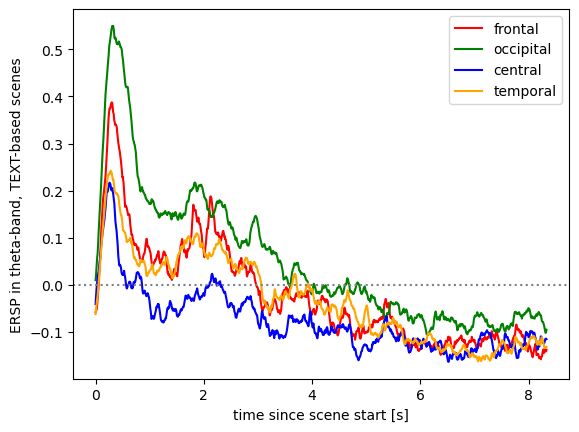

In [18]:
THETA_TEXT_ch=np.zeros((18,2500))

for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_theta=data_files_theta[k][3]
    
    mat = spio.loadmat(data_theta)
    aa=mat['theta_']
    aa1=np.median(aa, axis=0) #over triasl
    
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa1[0:18,0:2500]
    THETA_TEXT_ch=THETA_TEXT_ch+matrix/40

    
THETA_TEXT_front=np.median(THETA_TEXT_ch[[2,3,4,8,9],:],axis=0)
THETA_TEXT_centr=np.median(THETA_TEXT_ch[[1,5,7],:],axis=0)
THETA_TEXT_occip=np.median(THETA_TEXT_ch[[0,6,12,13],:],axis=0)
THETA_TEXT_temp=np.median(THETA_TEXT_ch[[10,11,14,15,16,17],:],axis=0)

#25_percentile

THETA_TEXT_front_25=np.percentile(THETA_TEXT_ch[[2,3,4,8,9],:],25, axis=0)
THETA_TEXT_centr_25=np.percentile(THETA_TEXT_ch[[1,5,7],:],25, axis=0)
THETA_TEXT_occip_25=np.percentile(THETA_TEXT_ch[[0,6,12,13],:],25, axis=0)
THETA_TEXT_temp_25=np.percentile(THETA_TEXT_ch[[10,11,14,15,16,17],:],25, axis=0)

#75_percentile

THETA_TEXT_front_75=np.percentile(THETA_TEXT_ch[[2,3,4,8,9],:],75, axis=0)
THETA_TEXT_centr_75=np.percentile(THETA_TEXT_ch[[1,5,7],:],75, axis=0)
THETA_TEXT_occip_75=np.percentile(THETA_TEXT_ch[[0,6,12,13],:],75, axis=0)
THETA_TEXT_temp_75=np.percentile(THETA_TEXT_ch[[10,11,14,15,16,17],:], 75, axis=0)


x1 = [i/300 for i in range(len(THETA_TEXT_ch[0,:]))]

plt.plot(x1,THETA_TEXT_front,"-r", label="frontal")
plt.plot(x1,THETA_TEXT_occip,"-g", label="occipital")
plt.plot(x1,THETA_TEXT_centr,"-b", label="central")
plt.plot(x1,THETA_TEXT_temp, label="temporal", color='orange')
plt.legend(loc="upper right")
plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.ylabel("ERSP in theta-band, TEXT-based scenes")

## BETA

Text(0, 0.5, 'ERSP in beta-band, TEXT-based scenes')

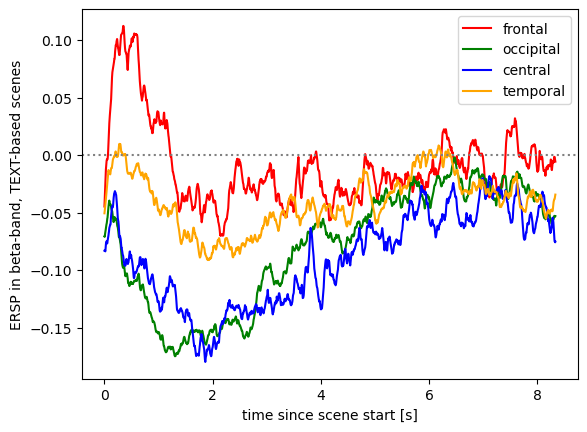

In [19]:
BETA_TEXT_ch=np.zeros((18,2500))

for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_beta=data_files_beta[k][3]
    
    mat = spio.loadmat(data_beta)
    aa=mat['beta_']
    aa1=np.median(aa, axis=0) #over triasl
    
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa1[0:18,0:2500]
    BETA_TEXT_ch=BETA_TEXT_ch+matrix/40

    
BETA_TEXT_front=np.median(BETA_TEXT_ch[[2,3,4,8,9],:],axis=0)
BETA_TEXT_centr=np.median(BETA_TEXT_ch[[1,5,7],:],axis=0)
BETA_TEXT_occip=np.median(BETA_TEXT_ch[[0,6,12,13],:],axis=0)
BETA_TEXT_temp=np.median(BETA_TEXT_ch[[10,11,14,15,16,17],:],axis=0)

#25_percentile

BETA_TEXT_front_25=np.percentile(BETA_TEXT_ch[[2,3,4,8,9],:],25, axis=0)
BETA_TEXT_centr_25=np.percentile(BETA_TEXT_ch[[1,5,7],:],25, axis=0)
BETA_TEXT_occip_25=np.percentile(BETA_TEXT_ch[[0,6,12,13],:],25, axis=0)
BETA_TEXT_temp_25=np.percentile(BETA_TEXT_ch[[10,11,14,15,16,17],:],25, axis=0)

#75_percentile

BETA_TEXT_front_75=np.percentile(BETA_TEXT_ch[[2,3,4,8,9],:],75, axis=0)
BETA_TEXT_centr_75=np.percentile(BETA_TEXT_ch[[1,5,7],:],75, axis=0)
BETA_TEXT_occip_75=np.percentile(BETA_TEXT_ch[[0,6,12,13],:],75, axis=0)
BETA_TEXT_temp_75=np.percentile(BETA_TEXT_ch[[10,11,14,15,16,17],:], 75, axis=0)


x1 = [i/300 for i in range(len(THETA_TEXT_ch[0,:]))]

plt.plot(x1,BETA_TEXT_front,"-r", label="frontal")
plt.plot(x1,BETA_TEXT_occip,"-g", label="occipital")
plt.plot(x1,BETA_TEXT_centr,"-b", label="central")
plt.plot(x1,BETA_TEXT_temp, label="temporal", color='orange')
plt.legend(loc="upper right")
plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.ylabel("ERSP in beta-band, TEXT-based scenes")

# Comparison between TEXT and VIDEO on different ROI

## THETA

### Visualization

(-0.6, 0.7)

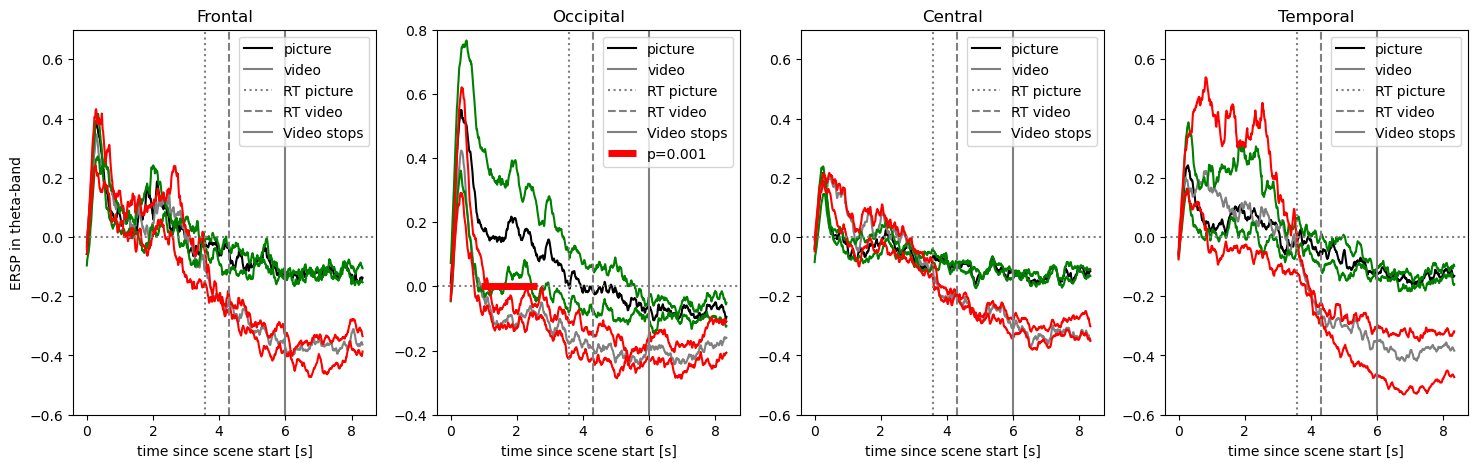

In [20]:
f, axes=plt.subplots(nrows=1,ncols=4,figsize=(18,5))

plt.subplot(1, 4, 1)
x1 = [i/300 for i in range(len(THETA_TEXT_ch[0,:]))]
x2 = [i/300 for i in range(len(THETA_VIDEO_ch[0,:]))]
plt.plot(x1,THETA_TEXT_front,color="black", label="picture")
plt.plot(x2,THETA_VIDEO_front,color="gray", label="video")

plt.plot(x1,THETA_TEXT_front_25,color="green")
plt.plot(x1,THETA_TEXT_front_75,color="green")

plt.plot(x2,THETA_VIDEO_front_25,color="red")
plt.plot(x2,THETA_VIDEO_front_75,color="red")


plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.title("Frontal")
plt.axvline(x = 3.58, color = 'gray', linestyle = ':',label="RT picture")
plt.axvline(x = 4.29, color = 'gray', linestyle = 'dashed',label="RT video")
plt.axvline(x = 6, color = 'gray',label="Video stops")
plt.legend(loc="upper right")
plt.ylabel("ERSP in theta-band")
plt.ylim([-0.6,0.7])

plt.subplot(1, 4, 2)
x1 = [i/300 for i in range(len(THETA_TEXT_ch[0,:]))]
x2 = [i/300 for i in range(len(THETA_VIDEO_ch[0,:]))]
plt.plot(x1,THETA_TEXT_occip,color="black", label="picture")
plt.plot(x2,THETA_VIDEO_occip,color="gray", label="video")
plt.plot(x1,THETA_TEXT_occip_25,color="green")
plt.plot(x1,THETA_TEXT_occip_75,color="green")
plt.plot(x2,THETA_VIDEO_occip_25,color="red")
plt.plot(x2,THETA_VIDEO_occip_75,color="red")

plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.axvline(x = 3.58, color = 'gray', linestyle = ':',label="RT picture")
plt.axvline(x = 4.29, color = 'gray', linestyle = 'dashed',label="RT video")
plt.axvline(x = 6, color = 'gray',label="Video stops")
plt.ylim([-0.4,0.8])

#-----significance-----
x11=276/300, 
x12=781/300

plt.hlines(y=-0.0, xmin=x11, xmax=x12, linewidth=5, color='r',label="p=0.001")
plt.legend(loc="upper right")
plt.title("Occipital")

plt.subplot(1, 4, 3)
x1 = [i/300 for i in range(len(THETA_TEXT_ch[0,:]))]
x2 = [i/300 for i in range(len(THETA_VIDEO_ch[0,:]))]
plt.plot(x1,THETA_TEXT_centr,color="black", label="picture")
plt.plot(x2,THETA_VIDEO_centr,color="gray", label="video")

plt.plot(x1,THETA_TEXT_centr_25,color="green")
plt.plot(x1,THETA_TEXT_centr_75,color="green")

plt.plot(x2,THETA_VIDEO_centr_25,color="red")
plt.plot(x2,THETA_VIDEO_centr_75,color="red")

plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.axvline(x = 3.58, color = 'gray', linestyle = ':',label="RT picture")
plt.axvline(x = 4.29, color = 'gray', linestyle = 'dashed',label="RT video")
plt.axvline(x = 6, color = 'gray',label="Video stops")
plt.legend(loc="upper right")
plt.title("Central")
plt.ylim([-0.6,0.7])


plt.subplot(1, 4, 4)
x1 = [i/300 for i in range(len(THETA_TEXT_ch[0,:]))]
x2 = [i/300 for i in range(len(THETA_VIDEO_ch[0,:]))]
plt.plot(x1,THETA_TEXT_temp,color="black", label="picture")
plt.plot(x2,THETA_VIDEO_temp,color="gray", label="video")

plt.plot(x1,THETA_TEXT_temp_25,color="green")
plt.plot(x1,THETA_TEXT_temp_75,color="green")

plt.plot(x2,THETA_VIDEO_temp_25,color="red")
plt.plot(x2,THETA_VIDEO_temp_75,color="red")

plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.axvline(x = 3.58, color = 'gray', linestyle = ':',label="RT picture")
plt.axvline(x = 4.29, color = 'gray', linestyle = 'dashed',label="RT video")
plt.axvline(x = 6, color = 'gray',label="Video stops")
plt.legend(loc="upper right")
plt.title("Temporal")
plt.ylim([-0.6,0.7])
#plt.savefig('/Users/maksimenko/Dropbox/!ETHICAL_AV_PAPER/time_ERSP_theta-IQR.eps',format='eps')

### Permutation Statistics 

In [29]:
#-----------------Frontal--------------------#
print('FRONTAL')
THETA_TEXT=np.zeros(2500)
DATA_THETA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_theta=data_files_theta[k][3]
    
    mat = spio.loadmat(data_theta)
    aa=mat['theta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[2,3,4,8,9],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(THETA_TEXT))]
    DATA_THETA_series = pd.concat([DATA_THETA_series,df])  
DATA_THETA_series
DATA_THETA_TEXT=pd.pivot_table(DATA_THETA_series,index='participant',columns='time').to_numpy()
DATA_THETA_TEXT.shape

THETA_VIDEO=np.zeros(2500)
DATA_THETA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_theta=data_files_theta_v[k][3]
    
    mat = spio.loadmat(data_theta)
    aa=mat['theta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[2,3,4,8,9],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(THETA_VIDEO))]
    DATA_THETA_series = pd.concat([DATA_THETA_series,df])  
    THETA_VIDEO=THETA_VIDEO+matrix/40
DATA_THETA_series
DATA_THETA_VIDEO=pd.pivot_table(DATA_THETA_series,index='participant',columns='time').to_numpy()
DATA_THETA_VIDEO.shape

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [DATA_THETA_TEXT[:,0:1590], DATA_THETA_VIDEO[:,0:1590]],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

print(cluster_p_values)
print(clusters)
print('-----//--------//------')
#------------Occipital-----------------------#
print('OCCIPITAL')
THETA_TEXT=np.zeros(2500)
DATA_THETA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_theta=data_files_theta[k][3]
    
    mat = spio.loadmat(data_theta)
    aa=mat['theta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[0,6,12,13],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(THETA_TEXT))]
    DATA_THETA_series = pd.concat([DATA_THETA_series,df])  
DATA_THETA_series
DATA_THETA_TEXT=pd.pivot_table(DATA_THETA_series,index='participant',columns='time').to_numpy()
DATA_THETA_TEXT.shape

THETA_VIDEO=np.zeros(2500)
DATA_THETA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_theta=data_files_theta_v[k][3]
    
    mat = spio.loadmat(data_theta)
    aa=mat['theta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[0,6,12,13],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(THETA_VIDEO))]
    DATA_THETA_series = pd.concat([DATA_THETA_series,df])  
    THETA_VIDEO=THETA_VIDEO+matrix/40
DATA_THETA_series
DATA_THETA_VIDEO=pd.pivot_table(DATA_THETA_series,index='participant',columns='time').to_numpy()
DATA_THETA_VIDEO.shape

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [DATA_THETA_TEXT[:,0:1590], DATA_THETA_VIDEO[:,0:1590]],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

print(cluster_p_values)
print(clusters)
print('-----//--------//------')

#-----------------Central---------------------#
print('CENTRAL')
THETA_TEXT=np.zeros(2500)
DATA_THETA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_theta=data_files_theta[k][3]
    
    mat = spio.loadmat(data_theta)
    aa=mat['theta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[1,5,7],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(THETA_TEXT))]
    DATA_THETA_series = pd.concat([DATA_THETA_series,df])  
DATA_THETA_series
DATA_THETA_TEXT=pd.pivot_table(DATA_THETA_series,index='participant',columns='time').to_numpy()
DATA_THETA_TEXT.shape

THETA_VIDEO=np.zeros(2500)
DATA_THETA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_theta=data_files_theta_v[k][3]
    
    mat = spio.loadmat(data_theta)
    aa=mat['theta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[1,5,7],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(THETA_VIDEO))]
    DATA_THETA_series = pd.concat([DATA_THETA_series,df])  
    THETA_VIDEO=THETA_VIDEO+matrix/40
DATA_THETA_series
DATA_THETA_VIDEO=pd.pivot_table(DATA_THETA_series,index='participant',columns='time').to_numpy()
DATA_THETA_VIDEO.shape

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [DATA_THETA_TEXT[:,0:1590], DATA_THETA_VIDEO[:,0:1590]],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

print(cluster_p_values)
print(clusters)
print('-----//--------//------')
#--------------------temporal----------------------#
print('TEMPORAL')
THETA_TEXT=np.zeros(2500)
DATA_THETA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_theta=data_files_theta[k][3]
    
    mat = spio.loadmat(data_theta)
    aa=mat['theta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[10,11,14,15,16,17],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(THETA_TEXT))]
    DATA_THETA_series = pd.concat([DATA_THETA_series,df])  
DATA_THETA_series
DATA_THETA_TEXT=pd.pivot_table(DATA_THETA_series,index='participant',columns='time').to_numpy()
DATA_THETA_TEXT.shape

THETA_VIDEO=np.zeros(2500)
DATA_THETA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_theta=data_files_theta_v[k][3]
    
    mat = spio.loadmat(data_theta)
    aa=mat['theta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[10,11,14,15,16,17],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(THETA_VIDEO))]
    DATA_THETA_series = pd.concat([DATA_THETA_series,df])  
    THETA_VIDEO=THETA_VIDEO+matrix/40
DATA_THETA_series
DATA_THETA_VIDEO=pd.pivot_table(DATA_THETA_series,index='participant',columns='time').to_numpy()
DATA_THETA_VIDEO.shape

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [DATA_THETA_TEXT[:,0:1590], DATA_THETA_VIDEO[:,0:1590]],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

print(cluster_p_values)
print(clusters)

FRONTAL
stat_fun(H1): min=0.000000 max=32.249444
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.072 0.237 0.149 0.037 0.002]
[(slice(1113, 1169, None),), (slice(1175, 1182, None),), (slice(1185, 1207, None),), (slice(1208, 1272, None),), (slice(1294, 1590, None),)]
-----//--------//------
OCCIPITAL
stat_fun(H1): min=0.216887 max=22.024972
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.119 0.159 0.247 0.223 0.002 0.016 0.075 0.002]
[(slice(175, 206, None),), (slice(208, 228, None),), (slice(229, 232, None),), (slice(235, 241, None),), (slice(276, 781, None),), (slice(862, 1007, None),), (slice(1016, 1078, None),), (slice(1081, 1590, None),)]
-----//--------//------
CENTRAL
stat_fun(H1): min=0.000001 max=13.702924
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.205 0.205 0.109 0.211 0.15  0.211 0.015]
[(slice(145, 156, None),), (slice(1167, 1178, None),), (slice(1297, 1331, None),), (slice(1343, 1353, None),), (slice(1402, 1424, None),), (slice(1442, 1452, None),), (slice(1466, 1590, None),)]
-----//--------//------
TEMPORAL
stat_fun(H1): min=0.000000 max=28.279843
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.127 0.001]
[(slice(1148, 1187, None),), (slice(1193, 1590, None),)]


## ALPHA

### Visualization

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


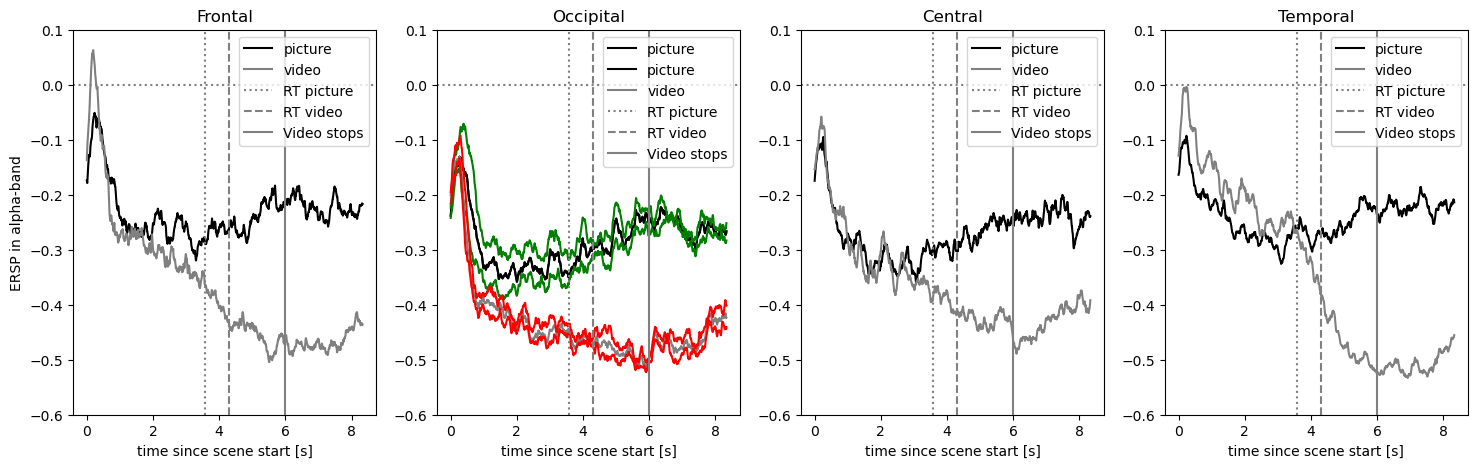

In [115]:
f, axes=plt.subplots(nrows=1,ncols=4,figsize=(18,5))

plt.subplot(1, 4, 1)
x1 = [i/300 for i in range(len(ALPHA_TEXT_ch[0,:]))]
x2 = [i/300 for i in range(len(ALPHA_VIDEO_ch[0,:]))]
plt.plot(x1,ALPHA_TEXT_front,color="black", label="picture")
plt.plot(x2,ALPHA_VIDEO_front, color="gray", label="video")

plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.axvline(x = 3.58, color = 'gray', linestyle = ':',label="RT picture")
plt.axvline(x = 4.29, color = 'gray', linestyle = 'dashed',label="RT video")
plt.axvline(x = 6, color = 'gray',label="Video stops")
plt.legend(loc="upper right")
plt.title("Frontal")
plt.ylabel("ERSP in alpha-band")
plt.ylim([-0.6,0.1])

plt.subplot(1, 4, 2)
x1 = [i/300 for i in range(len(ALPHA_TEXT_ch[0,:]))]
x2 = [i/300 for i in range(len(ALPHA_VIDEO_ch[0,:]))]
plt.plot(x1,ALPHA_TEXT_occip,color="black", label="picture")

plt.plot(x1,ALPHA_TEXT_occip,color="black", label="picture")
plt.plot(x1,ALPHA_TEXT_occip_25,color="green")
plt.plot(x1,ALPHA_TEXT_occip_75,color="green")
plt.plot(x2,ALPHA_VIDEO_occip,color="gray", label="video")

plt.plot(x2,ALPHA_VIDEO_occip_25,color="red")
plt.plot(x2,ALPHA_VIDEO_occip_75,color="red")

plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.axvline(x = 3.58, color = 'gray', linestyle = ':',label="RT picture")
plt.axvline(x = 4.29, color = 'gray', linestyle = 'dashed',label="RT video")
plt.axvline(x = 6, color = 'gray',label="Video stops")
plt.legend(loc="upper right")
plt.title("Occipital")
plt.ylim([-0.6,0.1])

plt.subplot(1, 4, 3)
x1 = [i/300 for i in range(len(ALPHA_TEXT_ch[0,:]))]
x2 = [i/300 for i in range(len(ALPHA_VIDEO_ch[0,:]))]
plt.plot(x1,ALPHA_TEXT_centr,color="black", label="picture")
plt.plot(x2,ALPHA_VIDEO_centr,color="gray", label="video")

plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.axvline(x = 3.58, color = 'gray', linestyle = ':',label="RT picture")
plt.axvline(x = 4.29, color = 'gray', linestyle = 'dashed',label="RT video")
plt.axvline(x = 6, color = 'gray',label="Video stops")
plt.legend(loc="upper right")
plt.title("Central")
plt.ylim([-0.6,0.1])

plt.subplot(1, 4, 4)
x1 = [i/300 for i in range(len(ALPHA_TEXT_ch[0,:]))]
x2 = [i/300 for i in range(len(ALPHA_VIDEO_ch[0,:]))]
plt.plot(x1,ALPHA_TEXT_temp,color="black", label="picture")
plt.plot(x2,ALPHA_VIDEO_temp,color="gray", label="video")

plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.axvline(x = 3.58, color = 'gray', linestyle = ':',label="RT picture")
plt.axvline(x = 4.29, color = 'gray', linestyle = 'dashed',label="RT video")
plt.axvline(x = 6, color = 'gray',label="Video stops")
plt.legend(loc="upper right")
plt.title("Temporal")
plt.ylim([-0.6,0.1])

plt.savefig('/Users/maksimenko/Dropbox/!ETHICAL_AV_PAPER/time_ERSP_alpha_IQR.eps',format='eps')

### Permutation statistics

In [31]:
print('FRONTAL')
ALPHA_TEXT=np.zeros(2500)
DATA_ALPHA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_alpha=data_files_alpha[k][3]
    
    mat = spio.loadmat(data_alpha)
    aa=mat['alpha_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[2,3,4,8,9],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(ALPHA_TEXT))]
    DATA_ALPHA_series = pd.concat([DATA_ALPHA_series,df])  
DATA_ALPHA_series
DATA_ALPHA_TEXT=pd.pivot_table(DATA_ALPHA_series,index='participant',columns='time').to_numpy()
DATA_ALPHA_TEXT.shape

ALPHA_VIDEO=np.zeros(2500)
DATA_ALPHA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_alpha=data_files_alpha_v[k][3]
    
    mat = spio.loadmat(data_alpha)
    aa=mat['alpha_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[2,3,4,8,9],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(ALPHA_VIDEO))]
    DATA_ALPHA_series = pd.concat([DATA_ALPHA_series,df])  
    ALPHA_VIDEO=ALPHA_VIDEO+matrix/40
DATA_ALPHA_series
DATA_ALPHA_VIDEO=pd.pivot_table(DATA_ALPHA_series,index='participant',columns='time').to_numpy()
DATA_ALPHA_VIDEO.shape

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [DATA_ALPHA_TEXT[:,0:1300], DATA_ALPHA_VIDEO[:,0:1300]],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

print(cluster_p_values)
print(clusters)
print('-----//--------//------')


#------------Occipital-----------------------#
print('OCCIPITAL')
ALPHA_TEXT=np.zeros(2500)
DATA_ALPHA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_alpha=data_files_alpha[k][3]
    
    mat = spio.loadmat(data_alpha)
    aa=mat['alpha_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[0,6,12,13],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(ALPHA_TEXT))]
    DATA_ALPHA_series = pd.concat([DATA_ALPHA_series,df])  
DATA_ALPHA_series
DATA_ALPHA_TEXT=pd.pivot_table(DATA_ALPHA_series,index='participant',columns='time').to_numpy()
DATA_ALPHA_TEXT.shape

ALPHA_VIDEO=np.zeros(2500)
DATA_ALPHA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_alpha=data_files_alpha_v[k][3]
    
    mat = spio.loadmat(data_alpha)
    aa=mat['alpha_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[0,6,12,13],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(ALPHA_VIDEO))]
    DATA_ALPHA_series = pd.concat([DATA_ALPHA_series,df])  
    ALPHA_VIDEO=THETA_VIDEO+matrix/40
DATA_ALPHA_series
DATA_ALPHA_VIDEO=pd.pivot_table(DATA_ALPHA_series,index='participant',columns='time').to_numpy()
DATA_ALPHA_VIDEO.shape

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [DATA_ALPHA_TEXT[:,0:1300], DATA_ALPHA_VIDEO[:,0:1300]],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

print(cluster_p_values)
print(clusters)
print('-----//--------//------')

#-----------------Central---------------------#
print('CENTRAL')
ALPHA_TEXT=np.zeros(2500)
DATA_ALPHA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_alpha=data_files_alpha[k][3]
    
    mat = spio.loadmat(data_alpha)
    aa=mat['alpha_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[1,5,7],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(ALPHA_TEXT))]
    DATA_ALPHA_series = pd.concat([DATA_ALPHA_series,df])  
DATA_ALPHA_series
DATA_ALPHA_TEXT=pd.pivot_table(DATA_ALPHA_series,index='participant',columns='time').to_numpy()
DATA_ALPHA_TEXT.shape

ALPHA_VIDEO=np.zeros(2500)
DATA_ALPHA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_alpha=data_files_alpha_v[k][3]
    
    mat = spio.loadmat(data_alpha)
    aa=mat['alpha_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[1,5,7],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(ALPHA_VIDEO))]
    DATA_ALPHA_series = pd.concat([DATA_ALPHA_series,df])  
    ALPHA_VIDEO=ALPHA_VIDEO+matrix/40
DATA_ALPHA_series
DATA_ALPHA_VIDEO=pd.pivot_table(DATA_ALPHA_series,index='participant',columns='time').to_numpy()
DATA_ALPHA_VIDEO.shape

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [DATA_ALPHA_TEXT[:,0:1300], DATA_ALPHA_VIDEO[:,0:1300]],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

print(cluster_p_values)
print(clusters)
print('-----//--------//------')
#--------------------temporal----------------------#
print('TEMPORAL')
ALPHA_TEXT=np.zeros(2500)
DATA_ALPHA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_alpha=data_files_alpha[k][3]
    
    mat = spio.loadmat(data_alpha)
    aa=mat['alpha_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[10,11,14,15,16,17],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(ALPHA_TEXT))]
    DATA_ALPHA_series = pd.concat([DATA_ALPHA_series,df])  
DATA_ALPHA_series
DATA_ALPHA_TEXT=pd.pivot_table(DATA_ALPHA_series,index='participant',columns='time').to_numpy()
DATA_ALPHA_TEXT.shape

ALPHA_VIDEO=np.zeros(2500)
DATA_ALPHA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_alpha=data_files_alpha_v[k][3]
    
    mat = spio.loadmat(data_alpha)
    aa=mat['alpha_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[10,11,14,15,16,17],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(ALPHA_VIDEO))]
    DATA_ALPHA_series = pd.concat([DATA_ALPHA_series,df])  
    ALPHA_VIDEO=ALPHA_VIDEO+matrix/40
DATA_ALPHA_series
DATA_ALPHA_VIDEO=pd.pivot_table(DATA_ALPHA_series,index='participant',columns='time').to_numpy()
DATA_ALPHA_VIDEO.shape

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [DATA_ALPHA_TEXT[:,0:1300], DATA_ALPHA_VIDEO[:,0:1300]],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

print(cluster_p_values)
print(clusters)

FRONTAL
stat_fun(H1): min=0.000019 max=17.279590
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.166 0.013]
[(slice(1109, 1111, None),), (slice(1192, 1300, None),)]
-----//--------//------
OCCIPITAL
stat_fun(H1): min=0.000000 max=12.635531
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.101 0.103 0.083 0.12  0.007]
[(slice(205, 216, None),), (slice(221, 231, None),), (slice(714, 734, None),), (slice(956, 959, None),), (slice(1086, 1300, None),)]
-----//--------//------
CENTRAL
stat_fun(H1): min=0.000010 max=7.421492
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.172 0.121 0.199 0.217]
[(slice(1236, 1245, None),), (slice(1246, 1267, None),), (slice(1270, 1275, None),), (slice(1287, 1289, None),)]
-----//--------//------
TEMPORAL
stat_fun(H1): min=0.000010 max=9.575986
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.122 0.218 0.161 0.218 0.097]
[(slice(1162, 1186, None),), (slice(1201, 1202, None),), (slice(1231, 1244, None),), (slice(1264, 1265, None),), (slice(1266, 1300, None),)]


## BETA

### Visualization

(-0.25, 0.25)

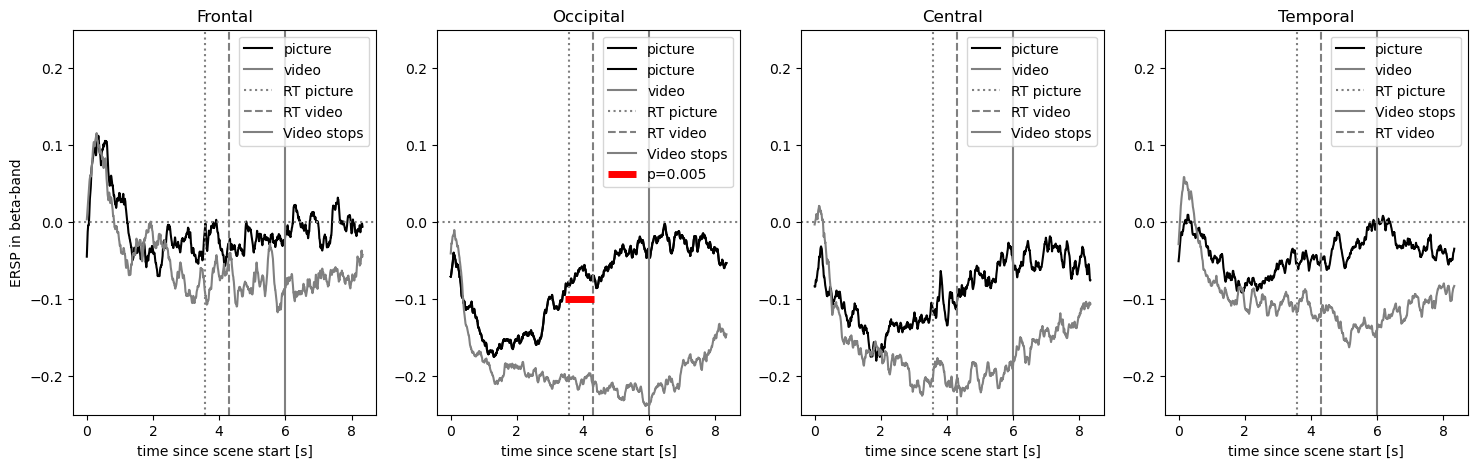

In [34]:
f, axes=plt.subplots(nrows=1,ncols=4,figsize=(18,5))

plt.subplot(1, 4, 1)
x1 = [i/300 for i in range(len(BETA_TEXT_ch[0,:]))]
x2 = [i/300 for i in range(len(BETA_VIDEO_ch[0,:]))]
plt.plot(x1,BETA_TEXT_front,color="black", label="picture")
plt.plot(x2,BETA_VIDEO_front,color="gray", label="video")

plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.title("Frontal")
plt.axvline(x = 3.58, color = 'gray', linestyle = ':',label="RT picture")
plt.axvline(x = 4.29, color = 'gray', linestyle = 'dashed',label="RT video")
plt.axvline(x = 6, color = 'gray',label="Video stops")
plt.legend(loc="upper right")
plt.ylabel("ERSP in beta-band")
plt.ylim([-0.25,0.25])

plt.subplot(1, 4, 2)
x1 = [i/300 for i in range(len(BETA_TEXT_ch[0,:]))]
x2 = [i/300 for i in range(len(BETA_VIDEO_ch[0,:]))]
plt.plot(x1,BETA_TEXT_occip,color="black", label="picture")
x2 = [i/300 for i in range(len(BETA_VIDEO_ch[0,:]))]
plt.plot(x1,BETA_TEXT_occip,color="black", label="picture")

plt.plot(x2,BETA_VIDEO_occip,color="gray", label="video")


plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.axvline(x = 3.58, color = 'gray', linestyle = ':',label="RT picture")
plt.axvline(x = 4.29, color = 'gray', linestyle = 'dashed',label="RT video")
plt.axvline(x = 6, color = 'gray',label="Video stops")
plt.ylim([-0.25,0.25])

#-----significance-----

x11=1035/300, 
x12=1300/300

plt.hlines(y=-0.1, xmin=x11, xmax=x12, linewidth=5, color='r',label="p=0.005")

plt.legend(loc="upper right")

plt.title("Occipital")

plt.subplot(1, 4, 3)
x1 = [i/300 for i in range(len(BETA_TEXT_ch[0,:]))]
x2 = [i/300 for i in range(len(BETA_VIDEO_ch[0,:]))]
plt.plot(x1,BETA_TEXT_centr,color="black", label="picture")
plt.plot(x2,BETA_VIDEO_centr,color="gray", label="video")

plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.axvline(x = 3.58, color = 'gray', linestyle = ':',label="RT picture")
plt.axvline(x = 4.29, color = 'gray', linestyle = 'dashed',label="RT video")
plt.axvline(x = 6, color = 'gray',label="Video stops")

plt.legend(loc="upper right")
plt.title("Central")
plt.ylim([-0.25,0.25])

plt.subplot(1, 4, 4)
x1 = [i/300 for i in range(len(BETA_TEXT_ch[0,:]))]
x2 = [i/300 for i in range(len(BETA_VIDEO_ch[0,:]))]
plt.plot(x1,BETA_TEXT_temp,color="black", label="picture")
plt.plot(x2,BETA_VIDEO_temp,color="gray", label="video")

plt.xlabel("time since scene start [s]")
plt.axhline(y = 0, color = 'gray', linestyle = ':')
plt.axvline(x = 3.58, color = 'gray', linestyle = ':',label="RT picture")
plt.axvline(x = 6, color = 'gray',label="Video stops")
plt.axvline(x = 4.29, color = 'gray', linestyle = 'dashed',label="RT video")
plt.legend(loc="upper right")
plt.title("Temporal")
plt.ylim([-0.25,0.25])
#plt.savefig('/Users/maksimenko/Dropbox/!ETHICAL_AV_PAPER/time_ERSP_beta-IQR.eps',format='eps')

### Permutation statistics

In [32]:
print('FRONTAL')
BETA_TEXT=np.zeros(2500)
DATA_BETA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_beta=data_files_beta[k][3]
    
    mat = spio.loadmat(data_beta)
    aa=mat['beta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[2,3,4,8,9],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(BETA_TEXT))]
    DATA_BETA_series = pd.concat([DATA_BETA_series,df])  
DATA_BETA_series
DATA_BETA_TEXT=pd.pivot_table(DATA_BETA_series,index='participant',columns='time').to_numpy()
DATA_BETA_TEXT.shape

BETA_VIDEO=np.zeros(2500)
DATA_BETA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_beta=data_files_beta_v[k][3]
    
    mat = spio.loadmat(data_beta)
    aa=mat['beta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[2,3,4,8,9],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(BETA_VIDEO))]
    DATA_BETA_series = pd.concat([DATA_BETA_series,df])  
    BETA_VIDEO=BETA_VIDEO+matrix/40
DATA_BETA_series
DATA_BETA_VIDEO=pd.pivot_table(DATA_BETA_series,index='participant',columns='time').to_numpy()
DATA_BETA_VIDEO.shape

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [DATA_BETA_TEXT[:,0:1300], DATA_BETA_VIDEO[:,0:1300]],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

print(cluster_p_values)
print(clusters)
print('-----//--------//------')


#------------Occipital-----------------------#
print('OCCIPITAL')
BETA_TEXT=np.zeros(2500)
DATA_BETA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_beta=data_files_beta[k][3]
    
    mat = spio.loadmat(data_beta)
    aa=mat['beta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[0,6,12,13],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(BETA_TEXT))]
    DATA_BETA_series = pd.concat([DATA_BETA_series,df])  
DATA_BETA_series
DATA_BETA_TEXT=pd.pivot_table(DATA_BETA_series,index='participant',columns='time').to_numpy()
DATA_BETA_TEXT.shape

BETA_VIDEO=np.zeros(2500)
DATA_BETA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_beta=data_files_beta_v[k][3]
    
    mat = spio.loadmat(data_beta)
    aa=mat['beta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[0,6,12,13],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(BETA_VIDEO))]
    DATA_BETA_series = pd.concat([DATA_BETA_series,df])  
    BETA_VIDEO=BETA_VIDEO+matrix/40
DATA_BETA_series
DATA_BETA_VIDEO=pd.pivot_table(DATA_BETA_series,index='participant',columns='time').to_numpy()
DATA_BETA_VIDEO.shape

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [DATA_BETA_TEXT[:,0:1300], DATA_BETA_VIDEO[:,0:1300]],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

print(cluster_p_values)
print(clusters)
print('-----//--------//------')

#-----------------Central---------------------#
print('CENTRAL')
BETA_TEXT=np.zeros(2500)
DATA_BETA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_beta=data_files_beta[k][3]
    
    mat = spio.loadmat(data_beta)
    aa=mat['beta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[1,5,7],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(BETA_TEXT))]
    DATA_BETA_series = pd.concat([DATA_BETA_series,df])  
DATA_BETA_series
DATA_BETA_TEXT=pd.pivot_table(DATA_BETA_series,index='participant',columns='time').to_numpy()
DATA_BETA_TEXT.shape

BETA_VIDEO=np.zeros(2500)
DATA_BETA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_beta=data_files_beta_v[k][3]
    
    mat = spio.loadmat(data_beta)
    aa=mat['beta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[1,5,7],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(BETA_VIDEO))]
    DATA_BETA_series = pd.concat([DATA_BETA_series,df])  
    BETA_VIDEO=BETA_VIDEO+matrix/40
DATA_BETA_series
DATA_BETA_VIDEO=pd.pivot_table(DATA_BETA_series,index='participant',columns='time').to_numpy()
DATA_BETA_VIDEO.shape

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [DATA_BETA_TEXT[:,0:1300], DATA_BETA_VIDEO[:,0:1300]],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

print(cluster_p_values)
print(clusters)
print('-----//--------//------')
#--------------------temporal----------------------#
print('TEMPORAL')
BETA_TEXT=np.zeros(2500)
DATA_BETA_series=pd.DataFrame()
for k in range(len(protocol_files)):
    
    participant = protocol_files[k][2]
    protocol_file=protocol_files[k][4]
    data_beta=data_files_beta[k][3]
    
    mat = spio.loadmat(data_beta)
    aa=mat['beta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[10,11,14,15,16,17],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(BETA_TEXT))]
    DATA_BETA_series = pd.concat([DATA_BETA_series,df])  
DATA_BETA_series
DATA_BETA_TEXT=pd.pivot_table(DATA_BETA_series,index='participant',columns='time').to_numpy()
DATA_BETA_TEXT.shape

BETA_VIDEO=np.zeros(2500)
DATA_BETA_series=pd.DataFrame()
for k in range(len(protocol_files_v)):
    
    participant = protocol_files_v[k][2]
    protocol_file=protocol_files_v[k][4]
    data_beta=data_files_beta_v[k][3]
    
    mat = spio.loadmat(data_beta)
    aa=mat['beta_']
    aa1=np.median(aa, axis=0) #over triasl
    aa2=np.median(aa1[[10,11,14,15,16,17],:], axis=0) #over channels
    #aa2=np.median(aa1, axis=0) #over channels
    matrix=aa2[0:2500]
    df = pd.DataFrame(matrix) 
    df['participant']=int(participant)
    df['time']=[i/300 for i in range(len(BETA_VIDEO))]
    DATA_BETA_series = pd.concat([DATA_BETA_series,df])  
    BETA_VIDEO=BETA_VIDEO+matrix/40
DATA_BETA_series
DATA_BETA_VIDEO=pd.pivot_table(DATA_BETA_series,index='participant',columns='time').to_numpy()
DATA_BETA_VIDEO.shape

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [DATA_BETA_TEXT[:,0:1300], DATA_BETA_VIDEO[:,0:1300]],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

print(cluster_p_values)
print(clusters)

FRONTAL
stat_fun(H1): min=0.000000 max=2.408935
Running initial clustering …
Found 0 clusters
[]
[]
-----//--------//------
OCCIPITAL


/var/folders/qc/srdfyg99647d_vkjg4_13mp80000gn/T/ipykernel_30137/182525149.py:48: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(


stat_fun(H1): min=0.000006 max=18.574809
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.046 0.157 0.118 0.042 0.008]
[(slice(869, 927, None),), (slice(928, 929, None),), (slice(943, 953, None),), (slice(958, 1026, None),), (slice(1035, 1300, None),)]
-----//--------//------
CENTRAL
stat_fun(H1): min=0.000001 max=11.638623
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.138 0.179 0.097 0.175 0.008]
[(slice(0, 12, None),), (slice(942, 948, None),), (slice(950, 977, None),), (slice(978, 985, None),), (slice(1119, 1300, None),)]
-----//--------//------
TEMPORAL
stat_fun(H1): min=0.000014 max=12.519228
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.163 0.153 0.044 0.016]
[(slice(892, 895, None),), (slice(1078, 1084, None),), (slice(1113, 1180, None),), (slice(1191, 1300, None),)]
